In [1]:
library(survival)
library(ggplot2)
library(dplyr)

Warning message:
“package ‘survival’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dir_fig = 'R_clogit/for_publish/'

In [3]:
file_main <- 'main_df_toR_ZS3_5_7_9_len50.csv'
df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
print(dim(df_main))
#df_main

df_main_ncar <- df_main %>%
    filter(!((rel=='C') & (Affected=='Yes') & (SNV_CAR==1)))

df_main_car <- df_main %>%
    filter(!((rel=='C') & (Affected=='Yes') & (SNV_CAR==0)))

PRINT_INFO = FALSE
if (PRINT_INFO) {
    print('non-carrier df dim:')
    print(dim(df_main_ncar))
    print('carrier df dim:')
    print(dim(df_main_car))

    print('parent case SNV_CAR table:')
    print(table(df_main[(df_main$rel=='P')&(df_main$Affected=='Yes'),]$SNV_CAR))
    print('parent control SNV_CAR table:')
    print(table(df_main[(df_main$rel=='P')&(df_main$Affected=='No'),]$SNV_CAR))
    print('child case SNV_CAR table:')
    print(table(df_main[(df_main$rel=='C')&(df_main$Affected=='Yes'),]$SNV_CAR))
    print('child control SNV_CAR table:')
    print(table(df_main[(df_main$rel=='C')&(df_main$Affected=='No'),]$SNV_CAR))
        
    print(dim(df_main_ncar))
    print('non-carrier df parent case SNV_CAR table:')
    print(table(df_main_ncar[(df_main_ncar$rel=='P')&(df_main_ncar$Affected=='Yes'),]$SNV_CAR))
    print('non-carrier df parent control SNV_CAR table:')
    print(table(df_main_ncar[(df_main_ncar$rel=='P')&(df_main_ncar$Affected=='No'),]$SNV_CAR))
    print('non-carrier df child case SNV_CAR table:')
    print(table(df_main_ncar[(df_main_ncar$rel=='C')&(df_main_ncar$Affected=='Yes'),]$SNV_CAR))
    print('non-carrier df child control SNV_CAR table:')
    print(table(df_main_ncar[(df_main_ncar$rel=='C')&(df_main_ncar$Affected=='No'),]$SNV_CAR))

    print(dim(df_main_car))
    print('carrier df parent case SNV_CAR table:')
    print(table(df_main_car[(df_main_car$rel=='P')&(df_main_car$Affected=='Yes'),]$SNV_CAR))
    print('carrier df parent control SNV_CAR table:')
    print(table(df_main_car[(df_main_car$rel=='P')&(df_main_car$Affected=='No'),]$SNV_CAR))
    print('carrier df child case SNV_CAR table:')
    print(table(df_main_car[(df_main_car$rel=='C')&(df_main_car$Affected=='Yes'),]$SNV_CAR))
    print('carrier df child control SNV_CAR table:')
    print(table(df_main_car[(df_main_car$rel=='C')&(df_main_car$Affected=='No'),]$SNV_CAR))
}

[1]  243 1488


In [4]:
### Clean features
fts = c('FDR_ASD_cds', 'FDR_DD_cds', 'FDR_NDD_cds', 
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        'FDR_ASD_utr', 'FDR_DD_utr', 'FDR_NDD_utr', 
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        'FDR_ASD_intron', 'FDR_DD_intron', 'FDR_NDD_intron', 
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        'FB_PR', 'FB_ENH', 'GNOCCHI_MAX_4', 'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
fts_labels = c('ASD FDR, CDS', 'DD FDR, CDS', 'NDD FDR, CDS', 
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               'ASD FDR, UTR', 'DD FDR, UTR', 'NDD FDR, UTR', 
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               'ASD FDR, intron', 'DD FDR, intron', 'NDD FDR, intron', 
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               'fetal brain promoter', 'fetal brain enhancer', 'Gnocchi≥4', 'Gnocchi≥3', 'Gnocchi≥2')

In [5]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

[1] "count_ZS3_FDR_ASD_cds_SUPP3"
[1] "count_ZS3_FDR_DD_cds_SUPP3"
[1] "count_ZS3_FDR_NDD_cds_SUPP3"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP3"
[1] "count_ZS3_DEV_BR_GENE_10_cds_SUPP3"
[1] "count_ZS3_PLIp9_cds_SUPP3"
[1] "count_ZS3_LOWPLI_cds_SUPP3"
[1] "count_ZS3_FDR_ASD_utr_SUPP3"
[1] "count_ZS3_FDR_DD_utr_SUPP3"
[1] "count_ZS3_FDR_NDD_utr_SUPP3"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP3"
[1] "count_ZS3_DEV_BR_GENE_10_utr_SUPP3"
[1] "count_ZS3_PLIp9_utr_SUPP3"
[1] "count_ZS3_LOWPLI_utr_SUPP3"
[1] "count_ZS3_FDR_ASD_intron_SUPP3"
[1] "count_ZS3_FDR_DD_intron_SUPP3"
[1] "count_ZS3_FDR_NDD_intron_SUPP3"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_intron_SUPP3"
[1] "count_ZS3_DEV_BR_GENE_10_intron_SUPP3"
[1] "count_ZS3_PLIp9_intron_SUPP3"
[1] "count_ZS3_LOWPLI_intron_SUPP3"
[1] "count_ZS3_FB_PR_SUPP3"
[1] "count_ZS3_FB_ENH_SUPP3"
[1] "count_ZS3_GNOCCHI_MAX_4_SUPP3"
[1] "count_ZS3_GNOCCHI_MAX_3_SUPP3"
[1] "count_ZS3_GNOCCHI_MAX_2_SUPP3"
[1] "ORs:"
 [1] 1.5641871 0.4295127 0.9278961 1.4091

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”


[1] "subset df:"
         ORs ORs_plus ORs_minus     log_ORs log_ORs_plus log_ORs_minus
5  1.0701488 1.618883 0.7074127  0.06779768  0.278994798   -0.14339943
12 1.0505919 1.424295 0.7749401  0.04935369  0.204623463   -0.10591609
19 0.9814248 1.034749 0.9308487 -0.01874988  0.008244808   -0.04574456
                     fts               fts_labels clogit_pval  ano_pval
5     DEV_BR_GENE_10_cds    dev. brain genes, CDS   0.7481982 0.7482568
12    DEV_BR_GENE_10_utr    dev. brain genes, UTR   0.7505929 0.7506937
19 DEV_BR_GENE_10_intron dev. brain genes, intron   0.4873207 0.4806716
   sum_case_con ano_sig
5        75/140        
12       94/180        
19    2027/4209        
[1] "R_clogit/for_publish/clogit_devBrain_lzs3_supp3.png"


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”


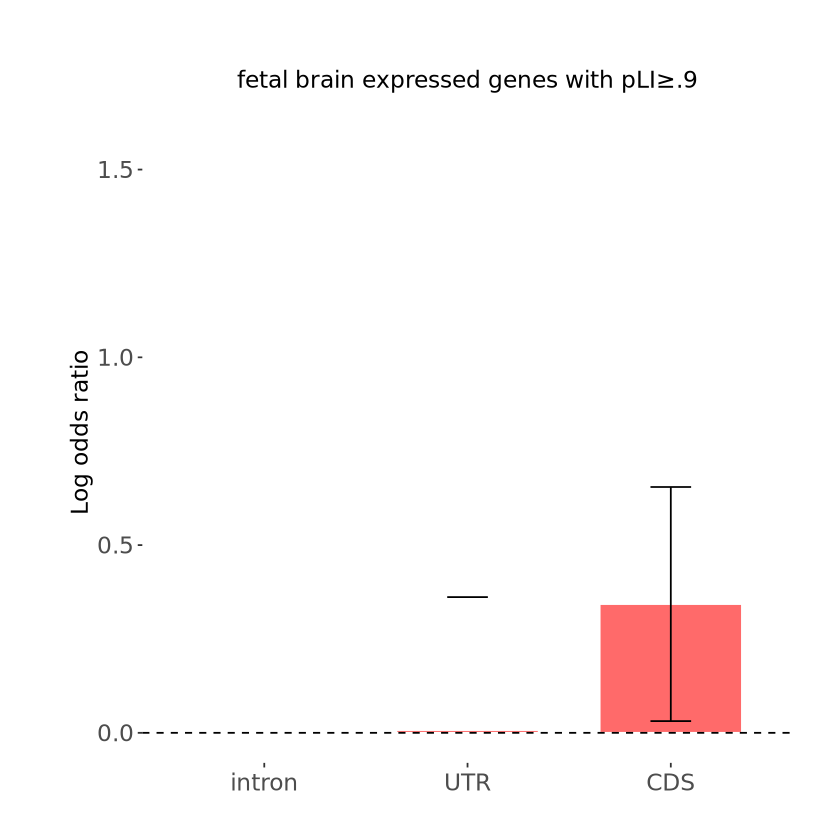

[1] "subset df:"
         ORs ORs_plus ORs_minus     log_ORs log_ORs_plus log_ORs_minus
6  0.9142948 1.319024 0.6337524 -0.08960225   0.09738824   -0.27659273
13 1.1889936 1.791673 0.7890421  0.17310726   0.38231663   -0.03610210
20 0.9600241 1.001650 0.9201278 -0.04079692  -0.01914053   -0.06245331
            fts     fts_labels clogit_pval   ano_pval sum_case_con ano_sig
6     PLIp9_cds    pLI≥.9, CDS   0.6318100 0.63112510       86/164        
13    PLIp9_utr    pLI≥.9, UTR   0.4079902 0.40635695       64/111        
20 PLIp9_intron pLI≥.9, intron   0.0595882 0.03944922    3082/6518       *
[1] "R_clogit/for_publish/clogit_PLI_lzs3_supp3.png"


Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”


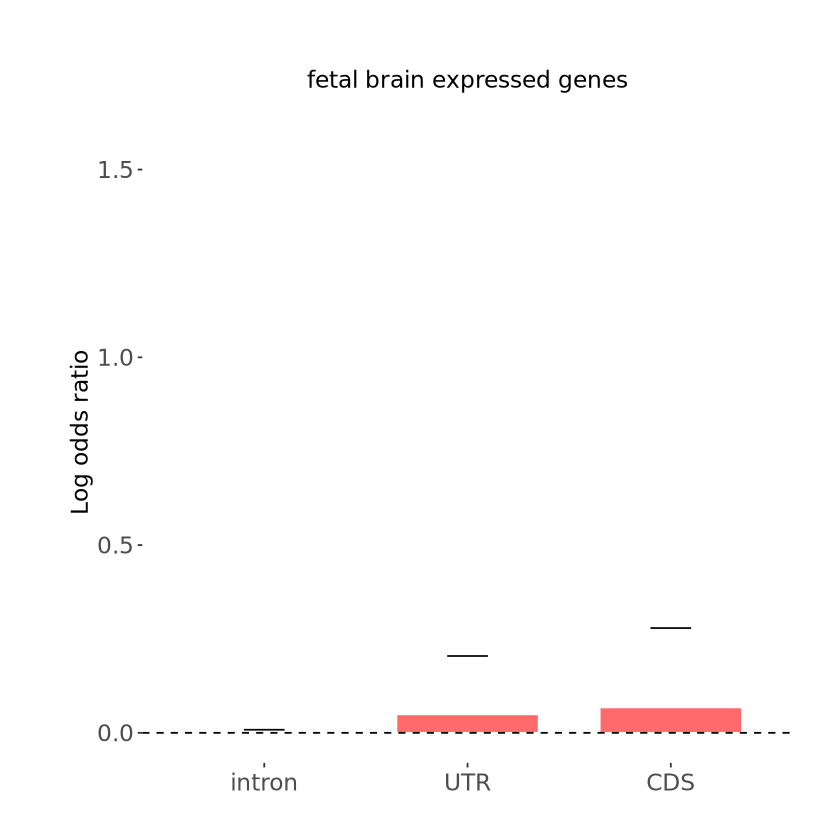

[1] "subset df:"
         ORs ORs_plus ORs_minus      log_ORs log_ORs_plus log_ORs_minus
7  0.9795502 1.139783 0.8418435 -0.020661747  0.056635286  -0.097958779
14 1.0466576 1.231789 0.8893508  0.045601865  0.128697981  -0.037494251
21 0.9989591 1.004273 0.9936733 -0.001041425  0.001665463  -0.003748313
             fts     fts_labels clogit_pval  ano_pval sum_case_con ano_sig
7     LOWPLI_cds    pLI≤.9, CDS   0.7892357 0.7890250      352/684        
14    LOWPLI_utr    pLI≤.9, UTR   0.5831533 0.5846885      319/605        
21 LOWPLI_intron pLI≤.9, intron   0.7004364 0.6957210  20619/41073        
[1] "R_clogit/for_publish/clogit_LOWPLI_lzs3_supp3.png"


Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”


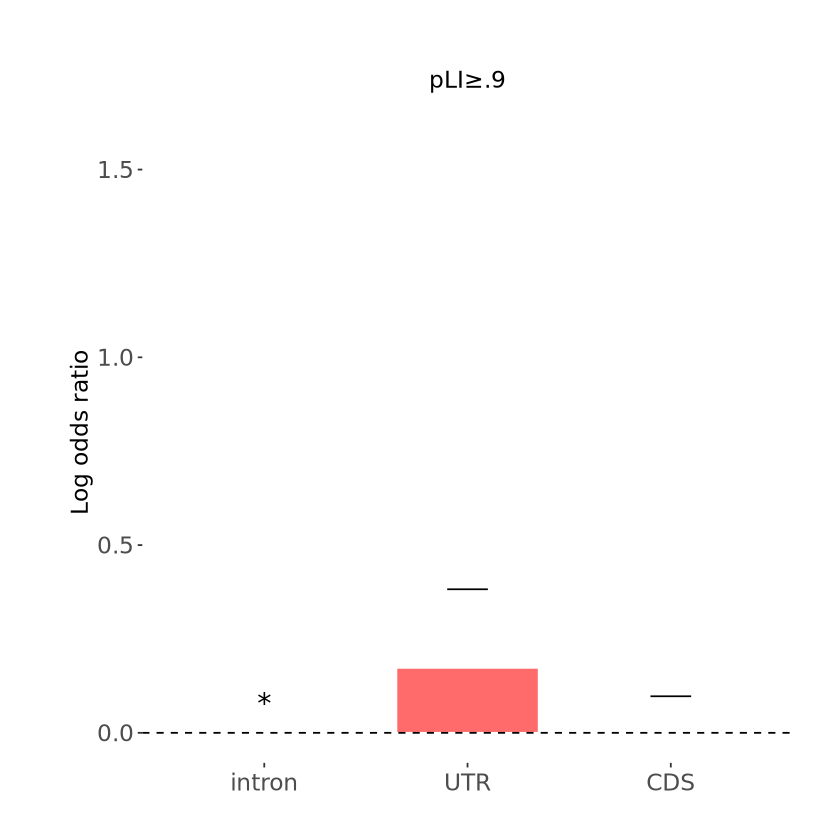

[1] "subset df:"
         ORs ORs_plus ORs_minus    log_ORs log_ORs_plus log_ORs_minus
1  1.5641871 5.762661 0.4245749  0.4473663   1.11270146   -0.21796892
8  0.5592462 2.077500 0.1505446 -0.5811654   0.08840342   -1.25073420
15 1.0156271 1.186537 0.8693353  0.0155063   0.09486116   -0.06384856
              fts      fts_labels clogit_pval  ano_pval sum_case_con ano_sig
1     FDR_ASD_cds    ASD FDR, CDS   0.5013340 0.5034062        10/12        
8     FDR_ASD_utr    ASD FDR, UTR   0.3854110 0.3703414         7/15        
15 FDR_ASD_intron ASD FDR, intron   0.8450763 0.8452782      278/553        
[1] "R_clogit/for_publish/clogit_FDR_ASD_lzs3_supp3.png"


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”


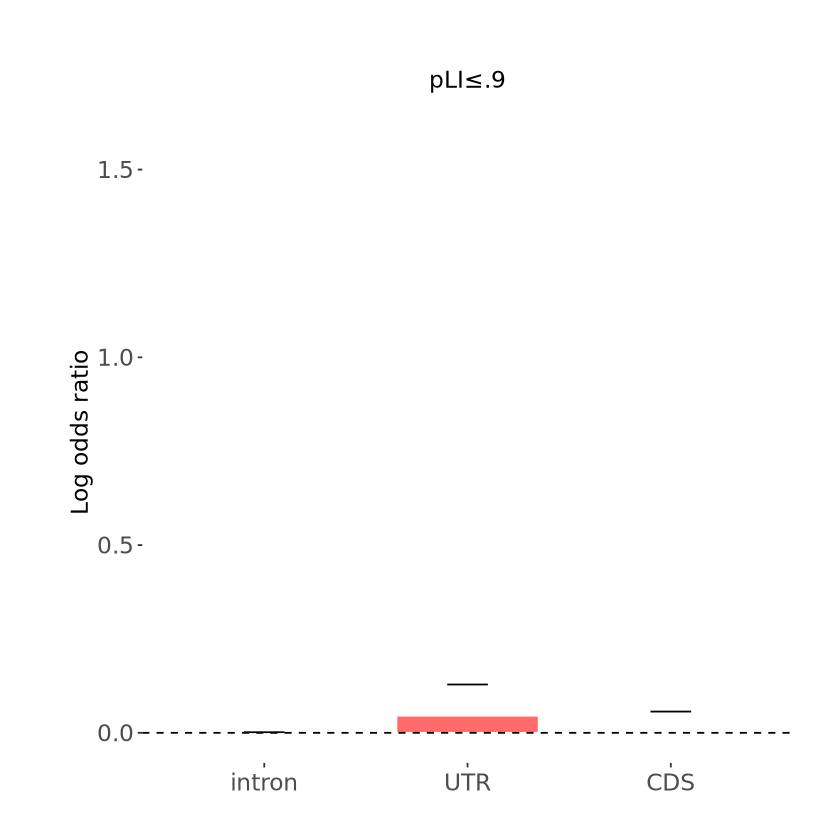

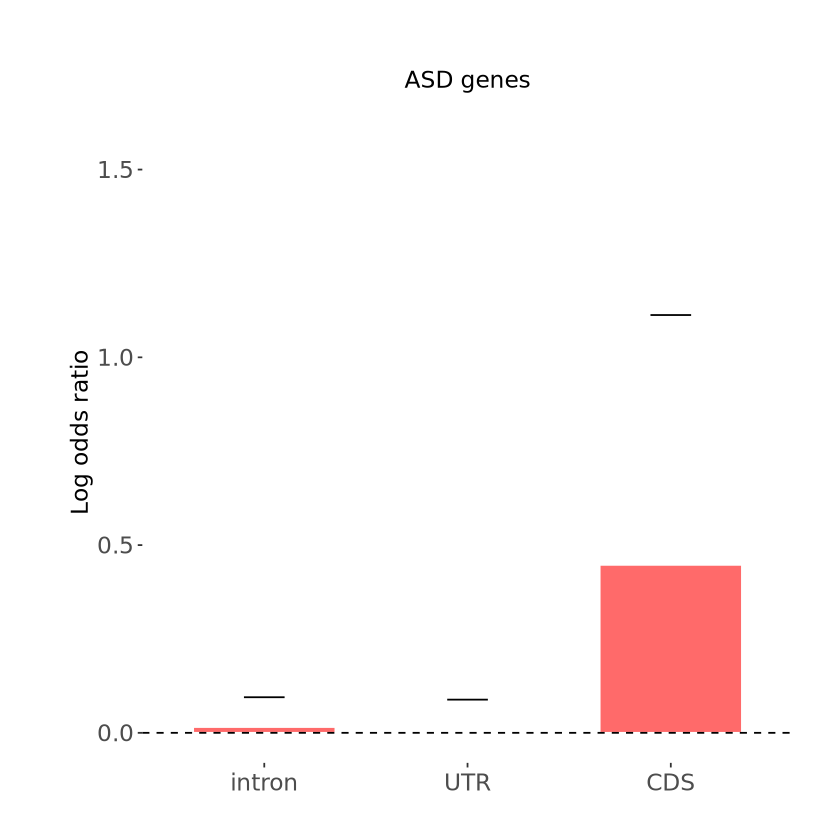

In [11]:
zs_thrs = c(3, 5, 7, 9)
supp_thr = 3

#q_suf = '_Q'
q_suf = ''

#car_mode = '_noncarr'
#car_mode = '_carr'
car_mode = '_all'

if (car_mode == '_noncarr') {df_flt = df_main_ncar} else if (car_mode == '_carr') {df_flt = df_main_car} else if (car_mode == '_all') {df_flt = df_main}

#for (i_zs in 1:length(zs_thrs)) {
for (i_zs in 1:1) {
    zs_thr = zs_thrs[i_zs]

    #fig_name = paste(dir_fig, "odds_ratio_clogit_lzs", zs_thr, supp_val, q_suf, car_mode, ".png", sep='')

    null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE +
                              PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

    ORs = c()
    ORs_plus = c()
    ORs_minus = c()
    log_ORs = c()
    log_ORs_plus = c()
    log_ORs_minus = c()
    pvals = c()
    ano_pvals = c()
    sum_cases = c()
    sum_controls = c()
    #for (ft in fts[c(1:1)]) {
    for (ft in fts) {
        #count_ZS3_PLI,count_ZS3_PLI_Q,count_ZS3_PLI_SUPP2,count_ZS3_PLI_SUPP2_Q
        #var = paste('count_ZS', zs_thr, '_', ft, q_suf, sep="")
        var = paste('count_ZS', zs_thr, '_', ft, '_SUPP', supp_thr, q_suf, sep="")
        print(var)
    
        sum_case = sum(df_flt[df_flt$Phenotype==1,][,var])
        sum_control = sum(df_flt[df_flt$Phenotype==0,][,var])
        sum_cases = c(sum_cases, sum_case)
        sum_controls = c(sum_controls, sum_control)
    
        #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + Platform + 
        #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE +
                                         PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
        null_model <- clogit(null_formula, data = df_flt)
        #print(summary(null_model))
    
        clogit_model <- clogit(model_formula, data = df_flt)
        #print(summary(clogit_model))
        #print(str(summary(clogit_model)))
        OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
        OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
        OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
        log_OR = summary(clogit_model)$coefficients[var, 'coef']
        log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
        log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
        pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
        ORs = c(ORs, OR)
        ORs_plus = c(ORs_plus, OR_plus)
        ORs_minus = c(ORs_minus, OR_minus)
        log_ORs = c(log_ORs, log_OR)
        log_ORs_plus = c(log_ORs_plus, log_OR_plus)
        log_ORs_minus = c(log_ORs_minus, log_OR_minus)
        pvals = c(pvals, pval)
        
        ano <- anova(null_model, clogit_model, test='Chisq')
        ano_pval = ano$"Pr(>|Chi|)"[2]
        ano_pvals = c(ano_pvals, ano_pval)
        #print(str(summary(ano)))
        #print(ano)
        #print(str(ano))
    }
    
    sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')
    
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)


    my_data = data.frame('ORs' = ORs, 'ORs_plus' = ORs_plus, 'ORs_minus' = ORs_minus,  
                         'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus,  
                         'fts' = fts, 'fts_labels' = fts_labels, 'clogit_pval' = pvals, 'ano_pval' = ano_pvals, 'sum_case_con' = sum_case_controls)
    my_data$fts <- factor(my_data$fts, levels = my_data$fts)
    my_data <- my_data[!is.infinite(my_data$ORs_plus),]
    anova_sig <- sapply(my_data$ano_pval, get_pval_char)
    print(anova_sig)
    my_data$ano_sig = anova_sig

    sub_fts_labels = c('intron', 'UTR', 'CDS')
    sub_fts_1 = c('PLIp9_DEV_BR_GENE_10_intron', 'PLIp9_DEV_BR_GENE_10_utr', 'PLIp9_DEV_BR_GENE_10_cds')
    title_1 = 'fetal brain expressed genes with pLI≥.9'
    fig_base_1 = 'devBrainPLI'
    sub_fts_2 = c('DEV_BR_GENE_10_intron', 'DEV_BR_GENE_10_utr', 'DEV_BR_GENE_10_cds')
    title_2 = 'fetal brain expressed genes'
    fig_base_2 = 'devBrain'
    sub_fts_3 = c('PLIp9_intron', 'PLIp9_utr', 'PLIp9_cds')
    title_3 = 'pLI≥.9'
    fig_base_3 = 'PLI'
    sub_fts_4 = c('LOWPLI_intron', 'LOWPLI_utr', 'LOWPLI_cds')
    title_4 = 'pLI≤.9'
    fig_base_4 = 'LOWPLI'
    sub_fts_5 = c('FDR_ASD_intron', 'FDR_ASD_utr', 'FDR_ASD_cds')
    title_5 = 'ASD genes'
    fig_base_5 = 'FDR_ASD'
    #sub_fts = c('GNOCCHI_MAX_3_intron', 'GNOCCHI_MAX_3_utr', 'GNOCCHI_MAX_3_cds', 'GNOCCHI_MAX_3_?')

    sub_flts_list = list(sub_fts_1, sub_fts_2, sub_fts_3, sub_fts_4, sub_fts_5)
    title_list = list(title_1, title_2, title_3, title_4, title_5)
    fig_base_list = list(fig_base_1, fig_base_2, fig_base_3, fig_base_4, fig_base_5)

    for (i_plot in 1:length(sub_flts_list)) {
    #for (i_plot in 1:1) {
        sub_fts = sub_flts_list[[i_plot]]
        title = title_list[[i_plot]]
        fig_base = fig_base_list[[i_plot]]
        fig_name = paste(dir_fig, "clogit_", fig_base, "_lzs", zs_thr, '_supp', supp_thr, q_suf, ".png", sep='')

        my_data_sub = my_data[my_data$fts %in% sub_fts,]
        my_data_sub$fts <- factor(my_data_sub$fts, levels = sub_fts)
        print('subset df:')
        print(my_data_sub)

        print(fig_name)
        size_txt = 14
        size_sig = 6
        label_pos = -.7
    
        base <- ggplot(my_data_sub, aes(x = fts, y = log_ORs, label = sum_case_con)) +
          geom_bar(stat = "identity", fill = "indianred1", color = "white", width = 0.7) +
          geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
          geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
          geom_text(aes(label = ano_sig, y = log_ORs_plus+0.1), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Log odds ratio", title = title) +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 0, vjust = .5, hjust=.5, size=size_txt),
                axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt)
               ) +
          scale_x_discrete(limits=sub_fts, labels=sub_fts_labels) +
          ylim(c(0, 1.6))
          #+
          #geom_text(aes(x = fts, y = label_pos, label = sum_case_con), angle=90, hjust=0.5, size=2)

        print(base)
    
        ggsave(fig_name, width = 5, height = 5)
    }
    
}